<a href="https://colab.research.google.com/github/SherylPhilip/Loan_defaulter_Prediction/blob/main/Loan_Defaulter_Predictions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

# To ignore any warnings
import warnings 
warnings.filterwarnings("ignore")

## Loading the data and creating a dataframe



In [ ]:
 # Importing dataset in csv format as the data received is in .txt format and then converted to excel.
lend_df =pd.read_csv(r'/content/drive/MyDrive/Python files/Capstone Project File (Loan Defaulter).csv',index_col=0,header=0)

In [ ]:
#lend_df=pd.read_excel(r"XYZCorp_LendingData.xlsx",header=0, index_col=0)

In [ ]:
# To display the entire dataframe 
pd.set_option("display.max.columns", None)

## Data Description


In [ ]:
# Checking the number of observations and number of variables in the dataset
print(lend_df.shape)

(855969, 73)


In [ ]:
# Viewing the top 5 rows of the dataset
lend_df.head(5)

member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
id                                                                        
1077501    1296599       5000         5000           4975.0   36 months   
1077430    1314167       2500         2500           2500.0   60 months   
1077175    1313524       2400         2400           2400.0   36 months   
1076863    1277178      10000        10000          10000.0   36 months   
1075358    1311748       3000         3000           3000.0   60 months   

         int_rate  installment grade sub_grade                 emp_title  \
id                                                                         
1077501     10.65       162.87     B        B2                       NaN   
1077430     15.27        59.83     C        C4                     Ryder   
1077175     15.96        84.33     C        C5                       NaN   
1076863     13.49       339.31     C        C1       AIR RESOURCES BOARD   
1075358     12.69        67.79     B        B5  University Medical Group   

        emp_length home_ownership  annual_inc verification_status  \
id                                                                  
1077501  10+ years           RENT     24000.0            Verified   
1077430   < 1 year           RENT     30000.0     Source Verified   
1077175  10+ years           RENT     12252.0        Not Verified   
1076863  10+ years           RENT     49200.0     Source Verified   
1075358     1 year           RENT     80000.0     Source Verified   

         Unnamed: 15     issue_d pymnt_plan  \
id                                            
1077501          NaN  01-12-2011          n   
1077430          NaN  01-12-2011          n   
1077175          NaN  01-12-2011          n   
1076863          NaN  01-12-2011          n   
1075358          NaN  01-12-2011          n   

                                                      desc         purpose  \
id                                                                           
1077501    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1077430    Borrower added on 12/22/11 > I plan to use t...             car   
1077175                                                NaN  small_business   
1076863    Borrower added on 12/21/11 > to pay for prop...           other   
1075358    Borrower added on 12/21/11 > I plan on combi...           other   

                        title zip_code addr_state    dti  delinq_2yrs  \
id                                                                      
1077501              Computer    860xx         AZ  27.65            0   
1077430                  bike    309xx         GA   1.00            0   
1077175  real estate business    606xx         IL   8.72            0   
1076863              personel    917xx         CA  20.00            0   
1075358              Personal    972xx         OR  17.94            0   

        earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
id                                                                 
1077501       01-01-1985               1                     NaN   
1077430       01-04-1999               5                     NaN   
1077175       01-11-2001               2                     NaN   
1076863       01-02-1996               1                    35.0   
1075358       01-01-1996               0                    38.0   

         mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
id                                                                          
1077501                     NaN         3        0      13648        83.7   
1077430                     NaN         3        0       1687         9.4   
1077175                     NaN         2        0       2956        98.5   
1076863                     NaN        10        0       5598        21.0   
1075358                     NaN        15        0      27783        53.9   

         total_acc initial_list_status  out_prncp  out_prncp

In [ ]:
# Checking the types of variables and the missing data in the dataset
lend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855969 entries, 1077501 to 36271262
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    855969 non-null  int64  
 1   loan_amnt                    855969 non-null  int64  
 2   funded_amnt                  855969 non-null  int64  
 3   funded_amnt_inv              855969 non-null  float64
 4   term                         855969 non-null  object 
 5   int_rate                     855969 non-null  float64
 6   installment                  855969 non-null  float64
 7   grade                        855969 non-null  object 
 8   sub_grade                    855969 non-null  object 
 9   emp_title                    806526 non-null  object 
 10  emp_length                   812908 non-null  object 
 11  home_ownership               855969 non-null  object 
 12  annual_inc                   855969 non-null  floa

In [ ]:
lend_df.describe()

member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count  8.559690e+05  855969.000000  855969.000000    855969.000000   
mean   3.476269e+07   14745.571335   14732.378305     14700.061226   
std    2.399418e+07    8425.340005    8419.471653      8425.805478   
min    7.069900e+04     500.000000     500.000000         0.000000   
25%    1.079273e+07    8000.000000    8000.000000      8000.000000   
50%    3.697532e+07   13000.000000   13000.000000     13000.000000   
75%    5.803559e+07   20000.000000   20000.000000     20000.000000   
max    7.351969e+07   35000.000000   35000.000000     35000.000000   

            int_rate    installment    annual_inc  Unnamed: 15            dti  \
count  855969.000000  855969.000000  8.559690e+05          0.0  855969.000000   
mean       13.192320     436.238072  7.507119e+04          NaN      18.122165   
std         4.368365     243.726876  6.426447e+04          NaN      17.423629   
min         5.320000      15.690000  0.000000e+00          NaN       0.000000   
25%         9.990000     260.550000  4.500000e+04          NaN      11.880000   
50%        12.990000     382.550000  6.500000e+04          NaN      17.610000   
75%        15.990000     571.560000  9.000000e+04          NaN      23.900000   
max        28.990000    1445.460000  9.500000e+06          NaN    9999.000000   

         delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  855969.000000   855969.000000           416157.000000   
mean        0.311621        0.680915               34.149943   
std         0.857189        0.964033               21.868500   
min         0.000000        0.000000                0.000000   
25%         0.000000        0.000000               15.000000   
50%         0.000000        0.000000               31.000000   
75%         0.000000        1.000000               50.000000   
max        39.000000        8.000000              188.000000   

       mths_since_last_record       open_acc        pub_rec     revol_bal  \
count           131184.000000  855969.000000  855969.000000  8.559690e+05   
mean                70.463959      11.542447       0.194537  1.691053e+04   
std                 27.827120       5.308094       0.581585  2.222374e+04   
min                  0.000000       0.000000       0.000000  0.000000e+00   
25%                 51.000000       8.000000       0.000000  6.469000e+03   
50%                 70.000000      11.000000       0.000000  1.190300e+04   
75%                 92.000000      14.000000       0.000000  2.085700e+04   
max                129.000000      90.000000      86.000000  2.904836e+06   

          revol_util      total_acc      out_prncp  out_prncp_inv  \
count  855523.000000  855969.000000  855969.000000  855969.000000   
mean       55.019405      25.269269    8284.830230    8281.449347   
std        23.811585      11.818841    8461.946669    8458.496422   
min         0.000000       2.000000       0.000000       0.000000   
25%        37.600000      17.000000       0.000000       0.000000   
50%        55.900000      24.000000    6290.250000    6287.650000   
75%        73.500000      32.000000   13528.800000   13522.510000   
max       892.300000     169.000000   49372.860000   49372.860000   

         total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  855969.000000     855969.00000    855969.000000  855969.000000   
mean     7653.296336       7622.22052      5850.841088    1755.046221   
std      7909.383591       7885.15640      6676.410888    2081.692980   
min         0.000000          0.00000         0.000000       0.000000   
25%      1969.690000       1960.12000      1239.950000     451.270000   
50%      4976.160000       4948.25000      3286.890000    1076.910000   
75%     10744.803650      10697.33000      8000.000000    2233.980000   
max     57777.579870      57777.58000     35000.030000   24205.620000   

       total_rec_late_fee     recoveries  collection_recovery_fee  \
count       855969.000000  85

In [ ]:
# Replacing the missing values in the data which is present as an underline.
lend_df=lend_df.replace('_', np.nan)

## Exploratory Data Analysis

In [ ]:
# Creating a copy of the dataframe
lend_df_rev = pd.DataFrame.copy(lend_df)

In [ ]:
lend_df_rev.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
id                                                                        
1077501    1296599       5000         5000           4975.0   36 months   
1077430    1314167       2500         2500           2500.0   60 months   
1077175    1313524       2400         2400           2400.0   36 months   
1076863    1277178      10000        10000          10000.0   36 months   
1075358    1311748       3000         3000           3000.0   60 months   

         int_rate  installment grade sub_grade                 emp_title  \
id                                                                         
1077501     10.65       162.87     B        B2                       NaN   
1077430     15.27        59.83     C        C4                     Ryder   
1077175     15.96        84.33     C        C5                       NaN   
1076863     13.49       339.31     C        C1       AIR RESOURCES BOARD   
1075358     12.69        67.79     B        B5  University Medical Group   

        emp_length home_ownership  annual_inc verification_status  \
id                                                                  
1077501  10+ years           RENT     24000.0            Verified   
1077430   < 1 year           RENT     30000.0     Source Verified   
1077175  10+ years           RENT     12252.0        Not Verified   
1076863  10+ years           RENT     49200.0     Source Verified   
1075358     1 year           RENT     80000.0     Source Verified   

         Unnamed: 15     issue_d pymnt_plan  \
id                                            
1077501          NaN  01-12-2011          n   
1077430          NaN  01-12-2011          n   
1077175          NaN  01-12-2011          n   
1076863          NaN  01-12-2011          n   
1075358          NaN  01-12-2011          n   

                                                      desc         purpose  \
id                                                                           
1077501    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1077430    Borrower added on 12/22/11 > I plan to use t...             car   
1077175                                                NaN  small_business   
1076863    Borrower added on 12/21/11 > to pay for prop...           other   
1075358    Borrower added on 12/21/11 > I plan on combi...           other   

                        title zip_code addr_state    dti  delinq_2yrs  \
id                                                                      
1077501              Computer    860xx         AZ  27.65            0   
1077430                  bike    309xx         GA   1.00            0   
1077175  real estate business    606xx         IL   8.72            0   
1076863              personel    917xx         CA  20.00            0   
1075358              Personal    972xx         OR  17.94            0   

        earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
id                                                                 
1077501       01-01-1985               1                     NaN   
1077430       01-04-1999               5                     NaN   
1077175       01-11-2001               2                     NaN   
1076863       01-02-1996               1                    35.0   
1075358       01-01-1996               0                    38.0   

         mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
id                                                                          
1077501                     NaN         3        0      13648        83.7   
1077430                     NaN         3        0       1687         9.4   
1077175                     NaN         2        0       2956        98.5   
1076863                     NaN        10        0       5598        21.0   
1075358                     NaN        15        0      27783        53.9   

         total_acc initial_list_status  out_prncp  out_prncp

In [ ]:
lend_df_rev.dtypes

member_id             int64
loan_amnt             int64
funded_amnt           int64
funded_amnt_inv     float64
term                 object
                     ...   
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
default_ind           int64
Length: 73, dtype: object

In [ ]:
# Handling the missing values
print(lend_df_rev.isnull().sum().sort_values(ascending=False))

Unnamed: 15                  855969
dti_joint                    855529
verification_status_joint    855527
annual_inc_joint             855527
il_util                      844360
                              ...  
pub_rec                           0
open_acc                          0
inq_last_6mths                    0
earliest_cr_line                  0
member_id                         0
Length: 73, dtype: int64


# Pre - Proccessing

In [ ]:
# Feature Selecting which variable to drop according to domain knowledge and missing variables
lend_df_rev=lend_df.drop(['member_id','desc','zip_code','addr_state','collections_12_mths_ex_med','emp_title','inq_last_6mths','last_pymnt_d',
                               'mths_since_last_record','next_pymnt_d','out_prncp_inv','pymnt_plan','revol_bal','revol_util','earliest_cr_line',
                              'sub_grade','term','title','total_acc','total_pymnt','mths_since_rcnt_il', 'total_bal_il','open_rv_12m',
                              'inq_fi','total_cu_tl', 'inq_last_12m','open_il_12m','open_il_6m','earliest_cr_line','last_credit_pull_d','Unnamed: 15',],axis=1)
lend_df_rev.shape


(855969, 43)

desc: This variable is just the loan description by the provider which will delude the model so dropped it.

zip_code:This variable is in num and the last few digits are missing so it does not make sense to keep it.

addr_state:This variable wont matter cause the dependent variable wont depend on the state and the length of this is "51" so keeping it might lead the data miscalculated.

collections_12_mths_ex_med:Medical collection makes not much relation to the dep var.

emp_title: In emp_title it is the job position of the borrower, most importantly it would  not add any significant information in predicting the result,so dropped it.

mths_since_last_record:Not significant for the prediction.

inq_last_6mths: Not significant for the prediction.

last_pymnt_d: The payment recieved at the end wont matter much and hence not significant.

next_payment_d: Not significant for model.

earliest_cr_line: Length of the variable is high, thus increasing the dimenson of the model by not providing any significant information.

sub_grade: As grade is already present in the data this is just a repetation.


last_credit_pull_d: It's a time series related and not significant for the model so better to drop it


member_id: Less important variable and is not significant for the model.

inq_last_6mths: More than 50% of the data falls under "0" or "no inquiry" category. Hence dropped the column.

term: This is basically number of payments which is mostly realted to the time series.

out_prncp_inv,pymnt_plan,revol_bal,revol_util,total_rec_late_fee,
title,total_acc,total_pymnt,mths_since_rcnt_il, total_bal_il,open_rv_12m,
inq_fi,total_cu_tl, inq_last_12m,open_il_12m,open_il_6m: Most of the variables here are not significant or either are just repetation of the existing variables like the ones with months.





In [ ]:
# Separating the Numerical/Date-Time variables and the Categorical variables
num_vars = lend_df_rev.columns[lend_df_rev.dtypes != 'object']
cat_vars = lend_df_rev.columns[lend_df_rev.dtypes == 'object']

print(num_vars)
print()
print(cat_vars)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'out_prncp',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'mths_since_last_major_derog', 'policy_code',
       'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_24m', 'il_util', 'open_rv_24m',
       'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

Index(['grade', 'emp_length', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'initial_list_status', 'application_type',
       'verification_status_joint'],
      dtype='object')


In [ ]:
lend_df_rev[num_vars].isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
int_rate                            0
installment                         0
annual_inc                          0
dti                                 0
delinq_2yrs                         0
mths_since_last_delinq         439812
open_acc                            0
pub_rec                             0
out_prncp                           0
total_pymnt_inv                     0
total_rec_prncp                     0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
last_pymnt_amnt                     0
mths_since_last_major_derog    642830
policy_code                         0
annual_inc_joint               855527
dti_joint                      855529
acc_now_delinq                      0
tot_coll_amt                    67313
tot_cur_bal                     67313
open_acc_6m 

In [ ]:
# Replacing the missing values with mean for numerical variables
for value in ['dti_joint','annual_inc_joint','il_util','open_acc_6m','all_util','max_bal_bc','open_rv_24m','open_il_24m','mths_since_last_major_derog','mths_since_last_delinq',
              'tot_coll_amt','tot_cur_bal','total_rev_hi_lim']:
    lend_df_rev[value].fillna(round(lend_df_rev[value].mean(),0),inplace=True)

In [ ]:
lend_df_rev[num_vars].isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
int_rate                       0
installment                    0
annual_inc                     0
dti                            0
delinq_2yrs                    0
mths_since_last_delinq         0
open_acc                       0
pub_rec                        0
out_prncp                      0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
mths_since_last_major_derog    0
policy_code                    0
annual_inc_joint               0
dti_joint                      0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
open_acc_6m                    0
open_il_24m                    0
il_util                        0
open_rv_24m                    0
max_bal_bc

In [ ]:
# Replacing the missing values with mode for categorical variables
for value in ['verification_status_joint','emp_length']:
    lend_df_rev[value].fillna(lend_df_rev[value].mode()[0],inplace=True)
  

In [ ]:
lend_df_rev[cat_vars].isnull().sum()

grade                        0
emp_length                   0
home_ownership               0
verification_status          0
issue_d                      0
purpose                      0
initial_list_status          0
application_type             0
verification_status_joint    0
dtype: int64

In [ ]:
lend_df_rev.head(5)

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment grade  \
id                                                                              
1077501       5000         5000           4975.0     10.65       162.87     B   
1077430       2500         2500           2500.0     15.27        59.83     C   
1077175       2400         2400           2400.0     15.96        84.33     C   
1076863      10000        10000          10000.0     13.49       339.31     C   
1075358       3000         3000           3000.0     12.69        67.79     B   

        emp_length home_ownership  annual_inc verification_status     issue_d  \
id                                                                              
1077501  10+ years           RENT     24000.0            Verified  01-12-2011   
1077430   < 1 year           RENT     30000.0     Source Verified  01-12-2011   
1077175  10+ years           RENT     12252.0        Not Verified  01-12-2011   
1076863  10+ years           RENT     49200.0     Source Verified  01-12-2011   
1075358     1 year           RENT     80000.0     Source Verified  01-12-2011   

                purpose    dti  delinq_2yrs  mths_since_last_delinq  open_acc  \
id                                                                              
1077501     credit_card  27.65            0                    34.0         3   
1077430             car   1.00            0                    34.0         3   
1077175  small_business   8.72            0                    34.0         2   
1076863           other  20.00            0                    35.0        10   
1075358           other  17.94            0                    38.0        15   

         pub_rec initial_list_status  out_prncp  total_pymnt_inv  \
id                                                                 
1077501        0                   f        0.0          5831.78   
1077430        0                   f        0.0          1008.71   
1077175        0                   f        0.0          3003.65   
1076863        0                   f        0.0         12226.30   
1075358        0                   f      766.9          3242.17   

         total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
id                                                                        
1077501          5000.00         861.07                0.00        0.00   
1077430           456.46         435.17                0.00      117.08   
1077175          2400.00         603.65                0.00        0.00   
1076863         10000.00        2209.33               16.97        0.00   
1075358          2233.10        1009.07                0.00        0.00   

         collection_recovery_fee  last_pymnt_amnt  \
id                                                  
1077501                     0.00           171.62   
1077430                     1.11           119.66   
1077175                     0.00           649.91   
1076863                     0.00           357.48   
1075358                     0.00            67.79   

         mths_since_last_major_derog  policy_code application_type  \
id                                                                   
1077501                         44.0            1       INDIVIDUAL   
1077430                         44.0            1       INDIVIDUAL   
1077175                         44.0            1       INDIVIDUAL   
1076863                         44.0            1       INDIVIDUAL   
1075358                         44.0            1       INDIVIDUAL   

         annual_inc_joint  dti_joint verification_status_joint  \
id                                                               
1077501          107412.0       18.0              Not Verified   
1077430          107412.0       18.0              Not Verified   
1077175          107412.0       18.0              Not Verified   
1076863          107412.0       18.0              Not Verified   
1075358          107412.0       18.0       

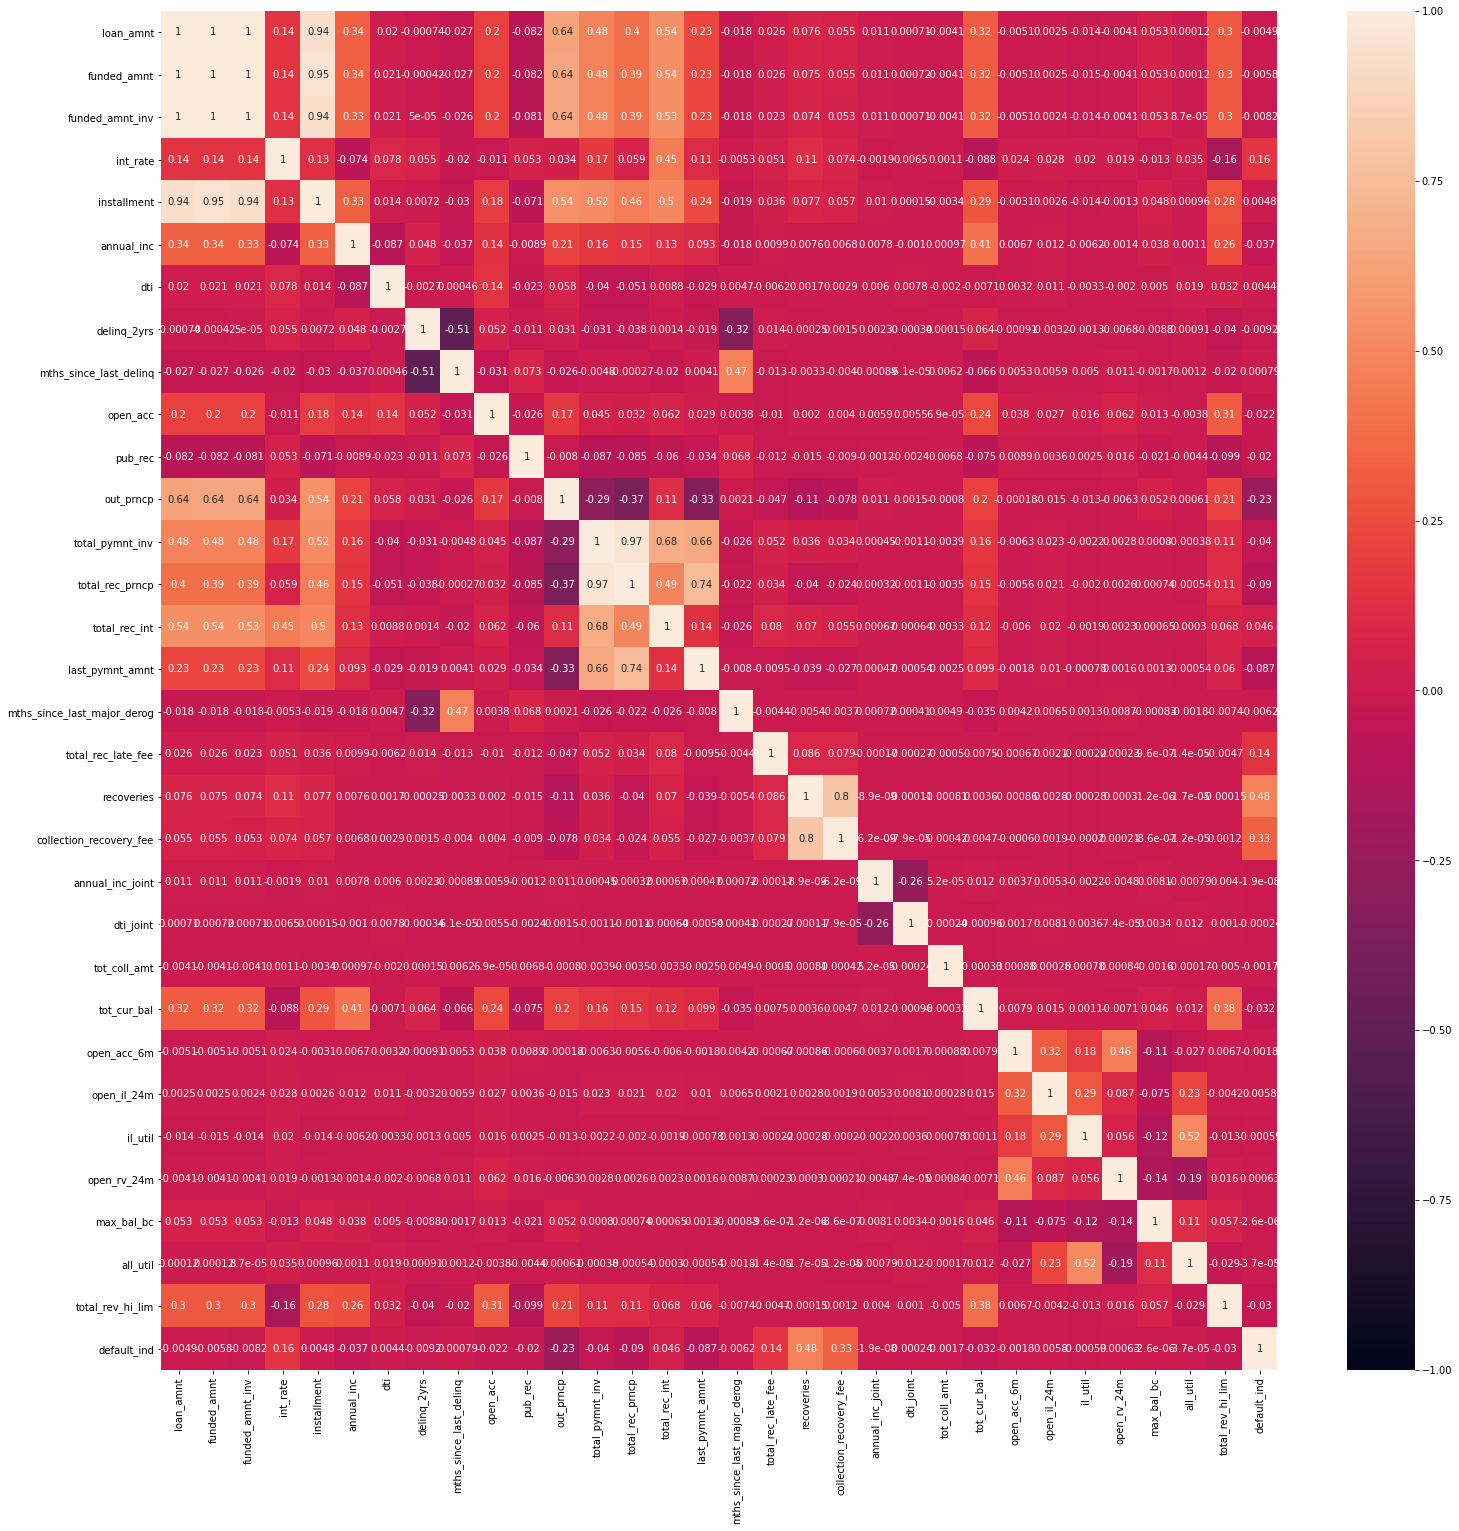

In [ ]:
# Correlation matrix       We can drop the X variables having very low correlation with our Y variable

correlation=lend_df_rev[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'out_prncp',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt', 'mths_since_last_major_derog',
       'total_rec_late_fee','recoveries','collection_recovery_fee',
       'annual_inc_joint', 'dti_joint', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_24m', 'il_util', 'open_rv_24m',
       'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'default_ind']]

corr_df=correlation.corr(method="pearson")
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

## Data Visualization

Text(0, 0.5, 'counts')

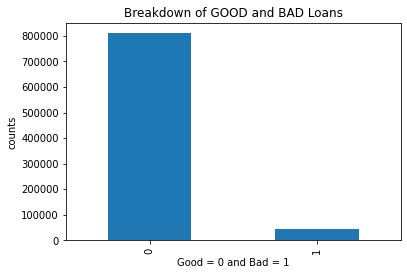

In [ ]:
# Overall breakdown of good and bad loans

ax = lend_df_rev['default_ind'].value_counts().plot(kind='bar',title='Breakdown of GOOD and BAD Loans')
ax.set_xlabel("Good = 0 and Bad = 1")
ax.set_ylabel("counts")

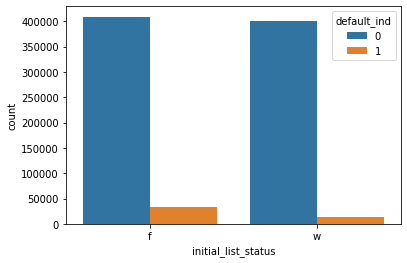

In [ ]:
# Initial listing status of the loan by Default Indicator

sns.countplot('initial_list_status',data=lend_df_rev,hue='default_ind')

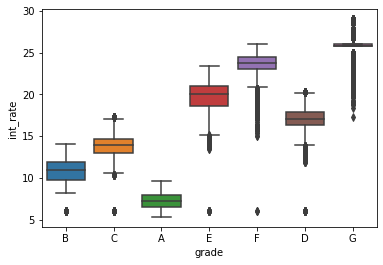

In [ ]:
# Interest rate and Grade of Loans

sns.boxplot('grade','int_rate',data=lend_df_rev)

Text(0, 0.5, 'Relative Frequency')

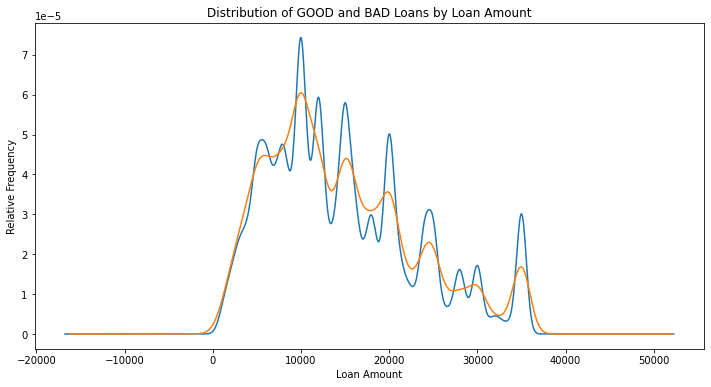

In [ ]:
# Distribution of loan amount
plt.figure(figsize=(12,6))
ax = lend_df_rev.groupby('default_ind').loan_amnt.plot(kind='kde', title='Distribution of GOOD and BAD Loans by Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Relative Frequency')

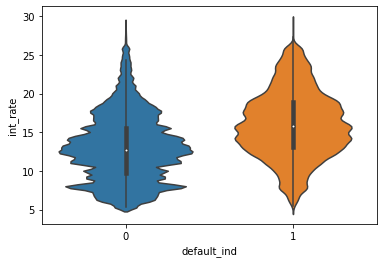

In [ ]:
# Distribution of GOOD and BAD Loans by Interest Rate

sns.violinplot('default_ind','int_rate',data=lend_df_rev,bw='scott')

Text(0, 0.5, 'default_ind')

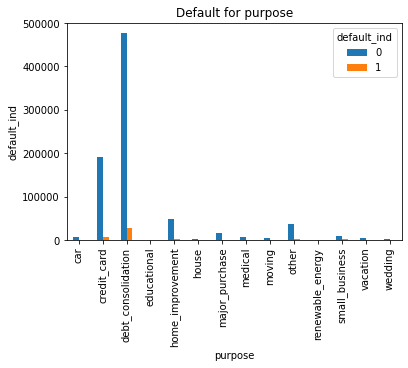

In [ ]:
# To check the purpose of the loan with respect to it be default or not.
pd.crosstab(lend_df_rev.purpose,lend_df_rev.default_ind).plot(kind='bar')
plt.title('Default for purpose')
plt.xlabel('purpose')
plt.ylabel('default_ind')

Text(0, 0.5, 'Loan Amount')

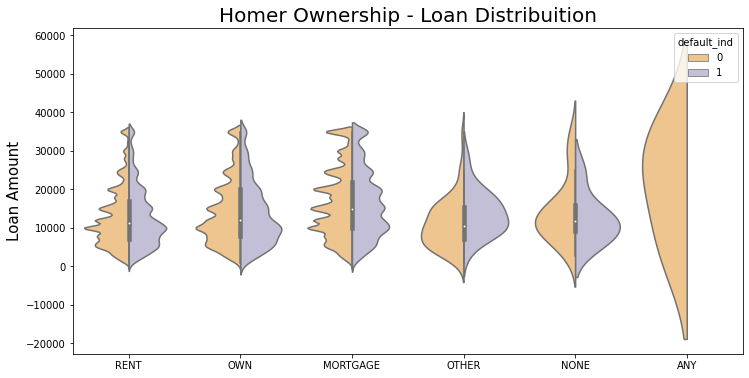

In [ ]:
# Home ownership, Loan amount and Default Indicator
plt.figure(figsize = (12,6))

g = sns.violinplot(x="home_ownership",y="loan_amnt",data=lend_df_rev,
               kind="violin",
               split=True,palette="PuOr",
               hue="default_ind")
g.set_title("Homer Ownership - Loan Distribuition", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

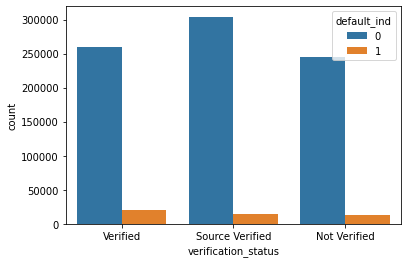

In [ ]:
# Verification status of the loan and Default Indicator

sns.countplot('verification_status',data=lend_df_rev,hue='default_ind')

## Train And Test Split 

In [ ]:
import datetime as datetime

In [ ]:
lend_df_rev['issue_d'] = pd.to_datetime(lend_df_rev['issue_d'])
lend_df_rev = lend_df_rev.set_index(lend_df_rev['issue_d'])
lend_df_rev = lend_df_rev.sort_index()

In [ ]:
lend_df_rev['issue_d'].min(), lend_df_rev['issue_d'].max()

(Timestamp('2007-01-06 00:00:00'), Timestamp('2015-01-12 00:00:00'))

In [ ]:
# Splitting the data into training and testing data according to the "issue_d" variable 
train = lend_df_rev['2007-01-01':'2015-01-05']
test  = lend_df_rev['01-06-2015':]
print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)

Train Dataset: (598978, 43)
Test Dataset: (256991, 43)


In [ ]:
train.head()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
issue_d                                                                      
2007-01-06       7500         7500            800.0     13.75       255.43   
2007-01-07       5000         5000           4150.0      7.43       155.38   
2007-01-07       5750         5750           3675.0      7.43       178.69   
2007-01-07       5000         5000           3975.0      7.43       155.38   
2007-01-07       1200         1200              0.0     11.54        39.60   

           grade emp_length home_ownership  annual_inc verification_status  \
issue_d                                                                      
2007-01-06     E   < 1 year            OWN     22000.0        Not Verified   
2007-01-07     A    8 years       MORTGAGE    150000.0        Not Verified   
2007-01-07     A  10+ years       MORTGAGE    125000.0        Not Verified   
2007-01-07     A    6 years           RENT     40000.0        Not Verified   
2007-01-07     C   < 1 year           RENT     20000.0        Not Verified   

              issue_d             purpose    dti  delinq_2yrs  \
issue_d                                                         
2007-01-06 2007-01-06  debt_consolidation  14.29            1   
2007-01-07 2007-01-07    home_improvement   0.00            0   
2007-01-07 2007-01-07  debt_consolidation   0.27            0   
2007-01-07 2007-01-07                 car   2.55            0   
2007-01-07 2007-01-07         credit_card   2.04            0   

            mths_since_last_delinq  open_acc  pub_rec initial_list_status  \
issue_d                                                                     
2007-01-06                    11.0         7        0                   f   
2007-01-07                     0.0         2        0                   f   
2007-01-07                     0.0        10        0                   f   
2007-01-07                     0.0         4        0                   f   
2007-01-07                    24.0         3        0                   f   

            out_prncp  total_pymnt_inv  total_rec_prncp  total_rec_int  \
issue_d                                                                  
2007-01-06        0.0           980.65           7500.0        1694.98   
2007-01-07        0.0          4294.57           5000.0         174.17   
2007-01-07        0.0          4104.19           5750.0         671.50   
2007-01-07        0.0          4446.74           5000.0         593.39   
2007-01-07        0.0             0.00           1200.0         225.37   

            total_rec_late_fee  recoveries  collection_recovery_fee  \
issue_d                                                               
2007-01-06                 0.0         0.0                      0.0   
2007-01-07                 0.0         0.0                      0.0   
2007-01-07                 0.0         0.0                      0.0   
2007-01-07                 0.0         0.0                      0.0   
2007-01-07                 0.0         0.0                      0.0   

            last_pymnt_amnt  mths_since_last_major_derog  policy_code  \
issue_d                                                                 
2007-01-06           256.59                         44.0            1   
2007-01-07          4397.47                         44.0            1   
2007-01-07             4.74                         44.0            1   
2007-01-07           158.65                         44.0            1   
2007-01-07            39.45                         44.0            1   

           application_type  annual_inc_joint  dti_joint  \
issue_d                                                    
2007-01-06       INDIVIDUAL          107412.0       18.0   
2007-01-07       INDIVIDUAL          107412.0       18.0   
2007-01-07       INDIVIDUAL          107412.0       18.0   
2007-01-07       INDIVIDUAL          107412.0       18.0   
2007-01-07       INDIVIDUAL      

In [ ]:
train.tail()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
issue_d                                                                      
2015-01-05       8800         8800           8800.0     10.99       288.06   
2015-01-05      12000        12000          12000.0      6.39       367.19   
2015-01-05      16000        16000          16000.0      6.92       493.45   
2015-01-05      10000        10000          10000.0      6.92       308.41   
2015-01-05       5000         5000           5000.0      6.92       154.21   

           grade emp_length home_ownership  annual_inc verification_status  \
issue_d                                                                      
2015-01-05     B  10+ years       MORTGAGE     20000.0            Verified   
2015-01-05     A    8 years       MORTGAGE     69000.0        Not Verified   
2015-01-05     A    5 years       MORTGAGE    165000.0        Not Verified   
2015-01-05     A    5 years       MORTGAGE     45000.0        Not Verified   
2015-01-05     A  10+ years       MORTGAGE     20000.0        Not Verified   

              issue_d             purpose    dti  delinq_2yrs  \
issue_d                                                         
2015-01-05 2015-01-05  debt_consolidation   4.44            1   
2015-01-05 2015-01-05  debt_consolidation  16.78            0   
2015-01-05 2015-01-05  debt_consolidation  12.83            0   
2015-01-05 2015-01-05    home_improvement  27.95            0   
2015-01-05 2015-01-05         credit_card  26.35            0   

            mths_since_last_delinq  open_acc  pub_rec initial_list_status  \
issue_d                                                                     
2015-01-05                     7.0         6        0                   f   
2015-01-05                    34.0         9        0                   f   
2015-01-05                    40.0        24        0                   f   
2015-01-05                    34.0         7        1                   w   
2015-01-05                    34.0        10        1                   w   

            out_prncp  total_pymnt_inv  total_rec_prncp  total_rec_int  \
issue_d                                                                  
2015-01-05    7086.08          2293.73          1713.92         579.81   
2015-01-05    9527.97          2933.26          2472.03         461.23   
2015-01-05   12725.00          3941.45          3275.00         666.45   
2015-01-05    7953.10          2459.59          2046.90         412.69   
2015-01-05       0.00          5129.80          5000.00         129.80   

            total_rec_late_fee  recoveries  collection_recovery_fee  \
issue_d                                                               
2015-01-05                 0.0         0.0                      0.0   
2015-01-05                 0.0         0.0                      0.0   
2015-01-05                 0.0         0.0                      0.0   
2015-01-05                 0.0         0.0                      0.0   
2015-01-05                 0.0         0.0                      0.0   

            last_pymnt_amnt  mths_since_last_major_derog  policy_code  \
issue_d                                                                 
2015-01-05           288.06                          7.0            1   
2015-01-05           367.19                         44.0            1   
2015-01-05           493.45                         44.0            1   
2015-01-05           308.41                         44.0            1   
2015-01-05          4669.09                         44.0            1   

           application_type  annual_inc_joint  dti_joint  \
issue_d                                                    
2015-01-05       INDIVIDUAL          107412.0       18.0   
2015-01-05       INDIVIDUAL          107412.0       18.0   
2015-01-05       INDIVIDUAL          107412.0       18.0   
2015-01-05       INDIVIDUAL          107412.0       18.0   
2015-01-05       INDIVIDUAL      

In [ ]:
test.head()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
issue_d                                                                      
2015-01-06      35000        35000          35000.0      9.17      1115.77   
2015-01-06      11500        11500          11475.0      9.17       239.68   
2015-01-06      12000        12000          12000.0     15.61       289.34   
2015-01-06      35000        35000          35000.0     12.29      1167.36   
2015-01-06      27000        27000          27000.0      8.18       549.80   

           grade emp_length home_ownership  annual_inc verification_status  \
issue_d                                                                      
2015-01-06     B     1 year       MORTGAGE    130000.0            Verified   
2015-01-06     B  10+ years           RENT     74000.0     Source Verified   
2015-01-06     D    2 years           RENT     48000.0     Source Verified   
2015-01-06     C    3 years       MORTGAGE    121000.0            Verified   
2015-01-06     B  10+ years       MORTGAGE    100000.0     Source Verified   

              issue_d             purpose    dti  delinq_2yrs  \
issue_d                                                         
2015-01-06 2015-01-06  debt_consolidation  26.59            0   
2015-01-06 2015-01-06  debt_consolidation  23.61            0   
2015-01-06 2015-01-06  debt_consolidation  31.40            0   
2015-01-06 2015-01-06  debt_consolidation  22.18            3   
2015-01-06 2015-01-06         credit_card  18.73            0   

            mths_since_last_delinq  open_acc  pub_rec initial_list_status  \
issue_d                                                                     
2015-01-06                    34.0        25        0                   w   
2015-01-06                    34.0         7        0                   w   
2015-01-06                    34.0         9        0                   w   
2015-01-06                    10.0        10        0                   w   
2015-01-06                    34.0        16        0                   w   

            out_prncp  total_pymnt_inv  total_rec_prncp  total_rec_int  \
issue_d                                                                  
2015-01-06   28923.94          7792.56          6076.06        1716.50   
2015-01-06   10571.62          1429.11           928.38         503.84   
2015-01-06   11174.11          1725.63           825.89         899.74   
2015-01-06   29160.72          8167.03          5839.28        2327.75   
2015-01-06   24386.79          3824.06          2613.21        1210.85   

            total_rec_late_fee  recoveries  collection_recovery_fee  \
issue_d                                                               
2015-01-06                 0.0         0.0                      0.0   
2015-01-06                 0.0         0.0                      0.0   
2015-01-06                 0.0         0.0                      0.0   
2015-01-06                 0.0         0.0                      0.0   
2015-01-06                 0.0         0.0                      0.0   

            last_pymnt_amnt  mths_since_last_major_derog  policy_code  \
issue_d                                                                 
2015-01-06          1115.77                         44.0            1   
2015-01-06           239.68                         44.0            1   
2015-01-06           289.34                         44.0            1   
2015-01-06          1167.36                         12.0            1   
2015-01-06           549.80                         44.0            1   

           application_type  annual_inc_joint  dti_joint  \
issue_d                                                    
2015-01-06       INDIVIDUAL          107412.0       18.0   
2015-01-06       INDIVIDUAL          107412.0       18.0   
2015-01-06       INDIVIDUAL          107412.0       18.0   
2015-01-06       INDIVIDUAL          107412.0       18.0   
2015-01-06       INDIVIDUAL      

In [ ]:
test.tail()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
issue_d                                                                      
2015-01-12      14400        14400          14400.0     11.99       478.22   
2015-01-12      20000        20000          20000.0      5.32       602.30   
2015-01-12      12000        12000          12000.0     13.67       277.18   
2015-01-12      35000        35000          35000.0     11.22      1149.51   
2015-01-12      34500        34500          34500.0     15.41       828.20   

           grade emp_length home_ownership  annual_inc verification_status  \
issue_d                                                                      
2015-01-12     C    8 years           RENT     57000.0            Verified   
2015-01-12     A  10+ years       MORTGAGE     99000.0        Not Verified   
2015-01-12     C    9 years           RENT     40000.0            Verified   
2015-01-12     B    2 years           RENT    120000.0     Source Verified   
2015-01-12     D    2 years           RENT     76000.0     Source Verified   

              issue_d             purpose    dti  delinq_2yrs  \
issue_d                                                         
2015-01-12 2015-01-12  debt_consolidation  22.15            0   
2015-01-12 2015-01-12         credit_card  12.61            0   
2015-01-12 2015-01-12  debt_consolidation  30.30            0   
2015-01-12 2015-01-12    home_improvement   2.82            0   
2015-01-12 2015-01-12  debt_consolidation  25.92            0   

            mths_since_last_delinq  open_acc  pub_rec initial_list_status  \
issue_d                                                                     
2015-01-12                    34.0         9        0                   f   
2015-01-12                    34.0        11        0                   w   
2015-01-12                    34.0        10        0                   w   
2015-01-12                    42.0        11        0                   w   
2015-01-12                    34.0        18        0                   w   

            out_prncp  total_pymnt_inv  total_rec_prncp  total_rec_int  \
issue_d                                                                  
2015-01-12   14065.66           459.04           334.34         124.70   
2015-01-12   19486.37           596.39           513.63          82.76   
2015-01-12   11859.52           268.07           140.48         127.59   
2015-01-12   34177.74          1127.69           822.26         305.43   
2015-01-12   34114.84           798.66           385.16         413.50   

            total_rec_late_fee  recoveries  collection_recovery_fee  \
issue_d                                                               
2015-01-12                 0.0         0.0                      0.0   
2015-01-12                 0.0         0.0                      0.0   
2015-01-12                 0.0         0.0                      0.0   
2015-01-12                 0.0         0.0                      0.0   
2015-01-12                 0.0         0.0                      0.0   

            last_pymnt_amnt  mths_since_last_major_derog  policy_code  \
issue_d                                                                 
2015-01-12           478.22                         44.0            1   
2015-01-12           602.30                         44.0            1   
2015-01-12           277.18                         44.0            1   
2015-01-12          1149.51                         57.0            1   
2015-01-12           828.20                         44.0            1   

           application_type  annual_inc_joint  dti_joint  \
issue_d                                                    
2015-01-12       INDIVIDUAL          107412.0       18.0   
2015-01-12       INDIVIDUAL          107412.0       18.0   
2015-01-12       INDIVIDUAL          107412.0       18.0   
2015-01-12       INDIVIDUAL          107412.0       18.0   
2015-01-12       INDIVIDUAL      

In [ ]:
lend_df_rev.head()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
issue_d                                                                      
2007-01-06       7500         7500            800.0     13.75       255.43   
2007-01-07       5000         5000           4150.0      7.43       155.38   
2007-01-07       5750         5750           3675.0      7.43       178.69   
2007-01-07       5000         5000           3975.0      7.43       155.38   
2007-01-07       1200         1200              0.0     11.54        39.60   

           grade emp_length home_ownership  annual_inc verification_status  \
issue_d                                                                      
2007-01-06     E   < 1 year            OWN     22000.0        Not Verified   
2007-01-07     A    8 years       MORTGAGE    150000.0        Not Verified   
2007-01-07     A  10+ years       MORTGAGE    125000.0        Not Verified   
2007-01-07     A    6 years           RENT     40000.0        Not Verified   
2007-01-07     C   < 1 year           RENT     20000.0        Not Verified   

              issue_d             purpose    dti  delinq_2yrs  \
issue_d                                                         
2007-01-06 2007-01-06  debt_consolidation  14.29            1   
2007-01-07 2007-01-07    home_improvement   0.00            0   
2007-01-07 2007-01-07  debt_consolidation   0.27            0   
2007-01-07 2007-01-07                 car   2.55            0   
2007-01-07 2007-01-07         credit_card   2.04            0   

            mths_since_last_delinq  open_acc  pub_rec initial_list_status  \
issue_d                                                                     
2007-01-06                    11.0         7        0                   f   
2007-01-07                     0.0         2        0                   f   
2007-01-07                     0.0        10        0                   f   
2007-01-07                     0.0         4        0                   f   
2007-01-07                    24.0         3        0                   f   

            out_prncp  total_pymnt_inv  total_rec_prncp  total_rec_int  \
issue_d                                                                  
2007-01-06        0.0           980.65           7500.0        1694.98   
2007-01-07        0.0          4294.57           5000.0         174.17   
2007-01-07        0.0          4104.19           5750.0         671.50   
2007-01-07        0.0          4446.74           5000.0         593.39   
2007-01-07        0.0             0.00           1200.0         225.37   

            total_rec_late_fee  recoveries  collection_recovery_fee  \
issue_d                                                               
2007-01-06                 0.0         0.0                      0.0   
2007-01-07                 0.0         0.0                      0.0   
2007-01-07                 0.0         0.0                      0.0   
2007-01-07                 0.0         0.0                      0.0   
2007-01-07                 0.0         0.0                      0.0   

            last_pymnt_amnt  mths_since_last_major_derog  policy_code  \
issue_d                                                                 
2007-01-06           256.59                         44.0            1   
2007-01-07          4397.47                         44.0            1   
2007-01-07             4.74                         44.0            1   
2007-01-07           158.65                         44.0            1   
2007-01-07            39.45                         44.0            1   

           application_type  annual_inc_joint  dti_joint  \
issue_d                                                    
2007-01-06       INDIVIDUAL          107412.0       18.0   
2007-01-07       INDIVIDUAL          107412.0       18.0   
2007-01-07       INDIVIDUAL          107412.0       18.0   
2007-01-07       INDIVIDUAL          107412.0       18.0   
2007-01-07       INDIVIDUAL      

In [ ]:
cat_vars

Index(['grade', 'emp_length', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'initial_list_status', 'application_type',
       'verification_status_joint'],
      dtype='object')

## Label Encoding 

In [ ]:
# "Fit" is responsible to create dictionaries 
# "Transform" helps to map the variables and convert the categorical variables into numerical variables
# For pre-processing the data

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in cat_vars:
    lend_df_rev[x]=le.fit_transform(lend_df_rev[x])

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_))) # This is to check how each variable is getting converted
print('Feature', x)
print('mapping', le_name_mapping)

Feature verification_status_joint
mapping {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}


In [ ]:
lend_df_rev.head()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
issue_d                                                                      
2007-01-06       7500         7500            800.0     13.75       255.43   
2007-01-07       5000         5000           4150.0      7.43       155.38   
2007-01-07       5750         5750           3675.0      7.43       178.69   
2007-01-07       5000         5000           3975.0      7.43       155.38   
2007-01-07       1200         1200              0.0     11.54        39.60   

            grade  emp_length  home_ownership  annual_inc  \
issue_d                                                     
2007-01-06      4          10               4     22000.0   
2007-01-07      0           8               1    150000.0   
2007-01-07      0           1               1    125000.0   
2007-01-07      0           6               5     40000.0   
2007-01-07      2          10               5     20000.0   

            verification_status  issue_d  purpose    dti  delinq_2yrs  \
issue_d                                                                 
2007-01-06                    0        0        2  14.29            1   
2007-01-07                    0        1        4   0.00            0   
2007-01-07                    0        1        2   0.27            0   
2007-01-07                    0        1        0   2.55            0   
2007-01-07                    0        1        1   2.04            0   

            mths_since_last_delinq  open_acc  pub_rec  initial_list_status  \
issue_d                                                                      
2007-01-06                    11.0         7        0                    0   
2007-01-07                     0.0         2        0                    0   
2007-01-07                     0.0        10        0                    0   
2007-01-07                     0.0         4        0                    0   
2007-01-07                    24.0         3        0                    0   

            out_prncp  total_pymnt_inv  total_rec_prncp  total_rec_int  \
issue_d                                                                  
2007-01-06        0.0           980.65           7500.0        1694.98   
2007-01-07        0.0          4294.57           5000.0         174.17   
2007-01-07        0.0          4104.19           5750.0         671.50   
2007-01-07        0.0          4446.74           5000.0         593.39   
2007-01-07        0.0             0.00           1200.0         225.37   

            total_rec_late_fee  recoveries  collection_recovery_fee  \
issue_d                                                               
2007-01-06                 0.0         0.0                      0.0   
2007-01-07                 0.0         0.0                      0.0   
2007-01-07                 0.0         0.0                      0.0   
2007-01-07                 0.0         0.0                      0.0   
2007-01-07                 0.0         0.0                      0.0   

            last_pymnt_amnt  mths_since_last_major_derog  policy_code  \
issue_d                                                                 
2007-01-06           256.59                         44.0            1   
2007-01-07          4397.47                         44.0            1   
2007-01-07             4.74                         44.0            1   
2007-01-07           158.65                         44.0            1   
2007-01-07            39.45                         44.0            1   

            application_type  annual_inc_joint  dti_joint  \
issue_d                                                     
2007-01-06                 0          107412.0       18.0   
2007-01-07                 0          107412.0       18.0   
2007-01-07                 0          107412.0       18.0   
2007-01-07                 0          107412.0       18.0   
2007-01-07                 0          107412.0       18.0   

            verificat

In [ ]:
lend_df_rev = lend_df_rev.drop(['issue_d'], axis=1)

In [ ]:
Y = lend_df_rev.values[:,-1]
X = lend_df_rev.values[:,0:-1]

In [ ]:
X.shape

(855969, 41)

In [ ]:
Y.shape

(855969,)

In [ ]:
Y=Y.astype(int)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[-8.59974264e-01 -8.59006696e-01 -1.64970214e+00 ... -1.08131721e-05
  -1.52657566e-04  1.08330662e-05]
 [-1.15669837e+00 -1.15593762e+00 -1.25211381e+00 ... -1.08131721e-05
  -1.52657566e-04  1.08330662e-05]
 [-1.06768114e+00 -1.06685834e+00 -1.30848827e+00 ... -1.08131721e-05
  -1.52657566e-04  1.08330662e-05]
 ...
 [-3.25870877e-01 -3.24531041e-01 -3.20451595e-01 ... -1.08131721e-05
  -1.52657566e-04 -3.08498379e-01]
 [ 2.40399088e+00  2.40723342e+00  2.40925935e+00 ... -1.08131721e-05
  -1.52657566e-04 -1.75853788e-01]
 [ 2.34464605e+00  2.34784724e+00  2.34991781e+00 ... -1.08131721e-05
  -1.52657566e-04  7.66475497e-01]]


# `Splitting the data into training and testing.`

In [ ]:
#Split the data into test and train

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)
                                                    

In [ ]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(599178, 41)
(599178,)
(256791, 41)
(256791,)


## Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

#create a model
classifier=LogisticRegression()

#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [ ]:
# Checking the accuracy and the type 1 and type 2 error with confusion matrix.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[242802     10]
 [   625  13354]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    242812
           1       1.00      0.96      0.98     13979

    accuracy                           1.00    256791
   macro avg       1.00      0.98      0.99    256791
weighted avg       1.00      1.00      1.00    256791

Accuracy of the model:  0.9975271719024421


In [ ]:
# Storing the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[9.98848829e-01 1.15117078e-03]
 [9.84615857e-01 1.53841426e-02]
 [9.99404893e-01 5.95107141e-04]
 ...
 [1.00000000e+00 1.70337279e-10]
 [9.99194627e-01 8.05372690e-04]
 [9.92527843e-01 7.47215749e-03]]


Adjusting the Threshold and trying to build a better model

In [ ]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 594  , type 2 error : 581  , type 1 error: 13
Errors at threshold  0.41000000000000003 : 600  , type 2 error : 588  , type 1 error: 12
Errors at threshold  0.42000000000000004 : 605  , type 2 error : 593  , type 1 error: 12
Errors at threshold  0.43000000000000005 : 611  , type 2 error : 599  , type 1 error: 12
Errors at threshold  0.44000000000000006 : 616  , type 2 error : 604  , type 1 error: 12
Errors at threshold  0.45000000000000007 : 620  , type 2 error : 608  , type 1 error: 12
Errors at threshold  0.4600000000000001 : 624  , type 2 error : 612  , type 1 error: 12
Errors at threshold  0.4700000000000001 : 628  , type 2 error : 618  , type 1 error: 10
Errors at threshold  0.4800000000000001 : 631  , type 2 error : 621  , type 1 error: 10
Errors at threshold  0.4900000000000001 : 634  , type 2 error : 624  , type 1 error: 10
Errors at threshold  0.5000000000000001 : 635  , type 2 error : 625  , type 1 error: 10
Errors at threshold  0.5100000000000001 : 

In [ ]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.40:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

[[242799     13]
 [   581  13398]]
Accuracy of the model:  0.9976868348189774
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    242812
           1       1.00      0.96      0.98     13979

    accuracy                           1.00    256791
   macro avg       1.00      0.98      0.99    256791
weighted avg       1.00      1.00      1.00    256791



In [ ]:
#Using cross validation

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=5,random_state=100)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.99692914 0.99745485 0.99712107 0.99737139 0.99732132]
0.9972395518754004


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

[[242799     13]
 [   581  13398]]
Accuracy of the model:  0.9976868348189774
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    242812
           1       1.00      0.96      0.98     13979

    accuracy                           1.00    256791
   macro avg       1.00      0.98      0.99    256791
weighted avg       1.00      1.00      1.00    256791



As you notice here that, adjusting the threshold to 0.40 and performing the K-Fold Cross Validation is giving the same output like the accuracy and the type 1 and 2 erros are same.

## XGBoost Algorithm

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

In [ ]:
xgboost = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)

In [ ]:
xgboost.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#XGBoost model on the train set
Y_pred = xgboost.predict(X_train)
acc= accuracy_score(Y_train,Y_pred)
print('accuracy score on train using XGBoost ',acc)

accuracy score on train using XGBoost  0.9974932323950478


In [ ]:
print(confusion_matrix(Y_train, Y_pred))

[[566667     23]
 [  1479  31009]]


## Random Forest Classifier


In [ ]:
leaf=[350,400,450,1000,1250]
for i in leaf:
         model = RandomForestClassifier(n_estimators = 150, oob_score = True, n_jobs = -1,random_state =100,min_samples_leaf=i)       
         model.fit(X_train,Y_train)
         pre=model.predict(X_test)
         print("for estimator 150","for min leaf",i,"accuracy of model is",accuracy_score(pre,Y_test))
#got 99.46 % efficiency for leaf of 1250


for estimator 150 for min leaf 350 accuracy of model is 0.9924919487053674
for estimator 150 for min leaf 400 accuracy of model is 0.9918532970392264
for estimator 150 for min leaf 450 accuracy of model is 0.9916079613382089
for estimator 150 for min leaf 1000 accuracy of model is 0.9845866872281349
for estimator 150 for min leaf 1250 accuracy of model is 0.9826084247500886


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_rf = RandomForestClassifier(random_state=10)
print('Number of Trees used : ',model.n_estimators)


Number of Trees used :  150


In [ ]:
# fit the model with the training data
model_rf.fit(X_train,Y_train)
# predict the target on the train dataset
predict = model.predict(X_test)
predict
accuracy = accuracy_score(Y_test,predict)
print('accuracy_score on train dataset : ', accuracy)


accuracy_score on train dataset :  0.9826084247500886


In [ ]:
# Predicting using the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=200, random_state=10)

# Fit the model on the data and predict the values

model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test,Y_pred))
print()
print(accuracy_score(Y_test,Y_pred))
print()
print(classification_report(Y_test,Y_pred))
print(list(zip(Y_test,Y_pred)))

[[242811      1]
 [   550  13429]]

0.9978542861704655

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    242812
           1       1.00      0.96      0.98     13979

    accuracy                           1.00    256791
   macro avg       1.00      0.98      0.99    256791
weighted avg       1.00      1.00      1.00    256791

[(0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), 

## Decision Tree Classifier

In [ ]:
# Predicting using Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier

model_DT=DecisionTreeClassifier(criterion="gini",random_state=10,min_samples_leaf=5,max_depth=10)

# Fit the model on the data and predict the values

model_DT.fit(X_train,Y_train)
Y_pred=model_DT.predict(X_test)
print(Y_pred)

print(list(zip(Y_test,Y_pred)))

[0 0 0 ... 0 0 0]
[(0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(confusion_matrix(Y_test,Y_pred))
print()
print(accuracy_score(Y_test,Y_pred))
print()
print(classification_report(Y_test,Y_pred))

[[242802     10]
 [   483  13496]]

0.9980801507841007

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    242812
           1       1.00      0.97      0.98     13979

    accuracy                           1.00    256791
   macro avg       1.00      0.98      0.99    256791
weighted avg       1.00      1.00      1.00    256791



In [ ]:
model_DT.score(X_train,Y_train)

0.9980857107570705

In [ ]:
# Checking the importance of each variable in the model

print(list(zip(lend_df_rev.columns,model_DT.feature_importances_)))

[('loan_amnt', 0.000403009483214765), ('funded_amnt', 0.19176840782477003), ('funded_amnt_inv', 0.004020480723027988), ('int_rate', 7.63513178183098e-05), ('installment', 0.0003555273218660318), ('grade', 4.481012814199158e-05), ('emp_length', 3.887096436693441e-05), ('home_ownership', 1.641319571644312e-05), ('annual_inc', 3.098015578768193e-05), ('verification_status', 0.0), ('purpose', 0.0), ('dti', 3.698944081819391e-05), ('delinq_2yrs', 5.358102276564977e-06), ('mths_since_last_delinq', 1.624856915191784e-05), ('open_acc', 9.413980056737128e-06), ('pub_rec', 1.9477624631016498e-07), ('initial_list_status', 3.847943096538111e-06), ('out_prncp', 0.03186498443287214), ('total_pymnt_inv', 8.892212201635905e-05), ('total_rec_prncp', 0.22048011336661605), ('total_rec_int', 0.00010192927703074011), ('total_rec_late_fee', 0.0006671872181508979), ('recoveries', 0.5245818911750147), ('collection_recovery_fee', 0.0), ('last_pymnt_amnt', 0.02529022656989687), ('mths_since_last_major_derog', 8

In [ ]:
from sklearn import tree
with open("model_DT.txt", "w") as f:

    f = tree.export_graphviz(model_DT, feature_names=lend_df_rev.columns[:-1],
                            out_file=f)

#generate the file and upload the code in webgraphviz.com to plot the decision tree

In [ ]:
Prediction=pd.DataFrame()
Prediction["Actual Prediction"]=Y_test
Prediction["Predicted prob"]=Y_pred
Prediction.to_excel("Loan Defaulter Predictions.xlsx",header=True)


## **Conclusion**

We have successfully built an machine learning algorithm to predict the people who might default on their loans.Also, we might want to look on other techniques or variables to improve the prediction power of the algorithm.

The models produce varying degrees of predictive powers, with Decision Tree performing best accuracy with about 0.9980% and the second best is Random Forest with about 0.9978%. So we are going with Decision Tree as the final model for the Loan Prediction.